In [16]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('../../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/params_testing/')
from model_files.nerm_pvals import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
import seaborn as sns
from scipy.optimize import curve_fit

In [10]:
ttdm2wt = np.load('mode1_allpars_wtpmlkl_ttds.npy')
ttdm2a20kd = np.load('mode1_allpars_a20kd_ttds.npy')
ttdm2a20oe = np.load('mode1_allpars_a2oed_ttds.npy')
ttdm2cyldkd = np.load('mode1_allpars_cyldkd_ttds.npy')
ttdm2cyldoe = np.load('mode1_allpars_cyldoe_ttds.npy')
ttdm2ciapkd = np.load('mode1_allpars_ciapkd_ttds.npy')
ttdm2ciapoe = np.load('mode1_allpars_ciapoe_ttds.npy')

In [11]:
ttdm2wt2 = [ttdm2wt / 60 for ttdm2wt in ttdm2wt]
ttdm2a20kd2 = [ttdm2a20kd / 60 for ttdm2a20kd in ttdm2a20kd]
ttdm2a20oe2 = [ttdm2a20oe / 60 for ttdm2a20oe in ttdm2a20oe]
ttdm2cyldkd2 = [ttdm2cyldkd / 60 for ttdm2cyldkd in ttdm2cyldkd]
ttdm2cyldoe2 = [ttdm2cyldoe / 60 for ttdm2cyldoe in ttdm2cyldoe]
ttdm2ciapkd2 = [ttdm2ciapkd / 60 for ttdm2ciapkd in ttdm2ciapkd]
ttdm2ciapoe2 = [ttdm2ciapoe/60 for ttdm2ciapoe in ttdm2ciapoe]

In [30]:
print(np.mean(ttdm2wt2))
print(np.mean(ttdm2a20kd2))
print(np.mean(ttdm2a20oe2))
print(np.mean(ttdm2ciapkd2))
print(np.mean(ttdm2ciapoe2))
print(np.mean(ttdm2cyldkd2))
print(np.mean(ttdm2cyldoe2))

10.744734962296299
11.35611305829412
10.300606761372954
10.914455818710932
10.763032305943371
10.413234235461214
12.192723866595884


In [17]:
# dfm232 = pd.melt(dfmode3)
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df2 = pd.DataFrame({'WT': ttdm2wt2,
                         'A20 KD': ttdm2a20kd2,
                          'A20 OE': ttdm2a20oe2,
                        'cIAP KD': ttdm2ciapkd2,
                         'cIAP OE': ttdm2ciapoe2,
                        'CYLD KD': ttdm2cyldkd2,
                          'CYLD OE': ttdm2cyldoe2})
dfclus2hr = pd.DataFrame(data = mode1df2,
                        columns = ['WT','A20 KD','A20 OE','cIAP KD','cIAP OE','CYLD KD','CYLD OE'])

No handles with labels found to put in legend.


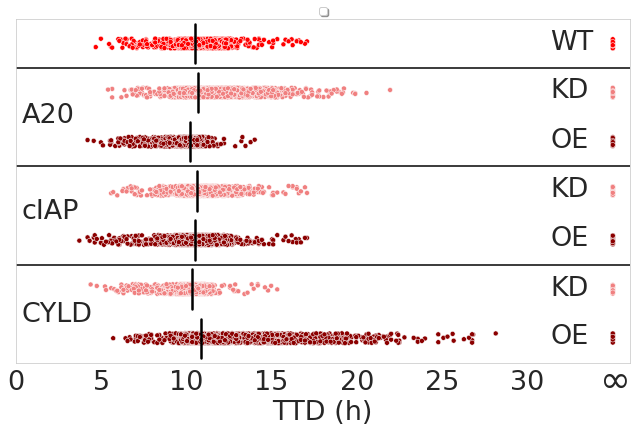

In [193]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,6))
my_pal = {"WT": "red",
          "A20 KD":"lightcoral", "A20 OE":"darkred",
          "cIAP KD": "lightcoral", "cIAP OE":"darkred",
         "CYLD KD": "lightcoral", "CYLD OE":"darkred",}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus2hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
medianprops = dict(linestyle='-', linewidth=2.5, color='k')
#            meanprops=meanpointprops,
# boxprops = dict(linestyle='*', linewidth=30, color='k')
b = sns.boxplot(showmeans=False,
            meanline=False,
            medianprops= medianprops,
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfclus2hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)
plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 27)
plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 27)
plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 27)
plt.annotate('WT', xy = (0.87,.912), xycoords ='axes fraction', fontsize = 27)#(-0.2,.7)
plt.annotate('KD', xy = (0.87,.77), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.87,.625), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.87,.483), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.87,.34), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.87,.197), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.87,.055), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)


plt.annotate(r'$\infty$', xy = (0.95,-0.08), xycoords ='axes fraction', fontsize = 37)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', ''])
b.set_xlabel("TTD (h)",fontsize = 27)
plt.xticks(fontsize = 27)
b.set_ylabel("")
b.tick_params(labelsize=27)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode1_initsens_100tnf_stripdots_hrs_kdoeinside_edgewhite_testingmedian.pdf')

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,9))
my_pal = {"WT": "red",
          "A20 KD":"lightcoral", "A20 OE":"darkred",
          "cIAP KD": "lightcoral", "cIAP OE":"darkred",
         "CYLD KD": "lightcoral", "CYLD OE":"darkred",}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfclus2hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '|', 'lw': 10},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfclus2hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)
plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)
plt.annotate('WT', xy = (0.01,.912), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('KD', xy = (0.01,.77), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.625), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.483), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.34), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.197), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.055), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)


plt.annotate(r'$\infty$', xy = (0.95,-0.05), xycoords ='axes fraction', fontsize = 30)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
# plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', ''])
b.set_xlabel("TTD (h)",fontsize = 20)
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.savefig('pmlkl_mode1_initsens_100tnf_stripdots_hrs_kdoeinside.pdf')

In [22]:
dfmode1hr = pd.read_csv("mode1_allparamsensdf_ttds.csv", index_col=0)

No handles with labels found to put in legend.


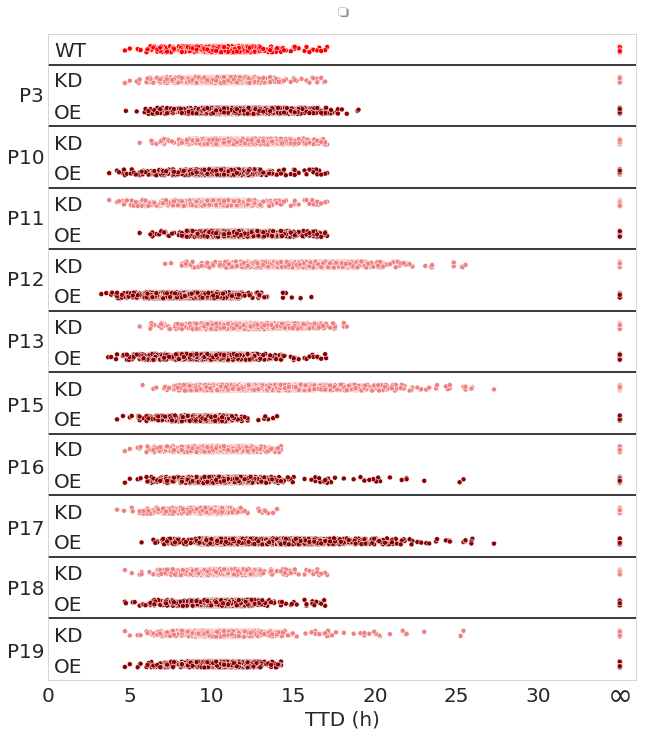

In [43]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (9,10))
my_pal = {"WT": "red",'P3 KD': "lightcoral", 'P3 OE':"darkred",
          'P10 KD': "lightcoral",'P10 OE':"darkred",
          'P11 KD': "lightcoral",'P11 OE':"darkred",
          'P12 KD': "lightcoral",'P12 OE':"darkred",
          'P13 KD': "lightcoral",'P13 OE':"darkred", 
          'P15 KD': "lightcoral",'P15 OE':"darkred", 
          'P16 KD': "lightcoral",'P16 OE':"darkred",
          'P17 KD': "lightcoral",'P17 OE':"darkred",
          'P18 KD': "lightcoral",'P18 OE':"darkred",
          'P19 KD': "lightcoral", 'P19 OE':"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfmode1hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)


plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
plt.axhline(y=14.5, color = 'k')
plt.axhline(y=16.5, color = 'k')
plt.axhline(y=18.5, color = 'k')
plt.annotate('WT', xy = (0.01,.965), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('KD', xy = (0.01,.919), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.869), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.821), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.775), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.727), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.678), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.630), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.584), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.537), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.488), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.441), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.394), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.347), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.298), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.25), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.203), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.155), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.107), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('KD', xy = (0.01,.06), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('OE', xy = (0.01,.012), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# # plt.axhline(y=18.5, color = 'k')
# # plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', '',
                                             '', '', '',''])
plt.annotate('P3', xy = (-0.05,.895), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
plt.annotate('P10', xy = (-0.07,.80), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P11', xy = (-0.07,.705), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P12', xy = (-0.07,.61), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P13', xy = (-0.07,.515), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P15', xy = (-0.07,.415), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P16', xy = (-0.07,.32), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P17', xy = (-0.07,.225), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
plt.annotate('P18', xy = (-0.07,.132), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate('P19', xy = (-0.07,.035), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)
plt.annotate(r'$\infty$', xy = (0.95,-0.035), xycoords ='axes fraction', fontsize = 30)
b.set_xlabel("TTD (h)",fontsize = 20)
plt.xticks(fontsize = 25)
b.set_ylabel("")
b.tick_params(labelsize=25)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
b.tick_params(labelsize=20)
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
# plt.savefig('pmlkl_mode1_paramsens_100tnf_stripdots_hrs_kdoeinside_edgewhite.pdf')

No handles with labels found to put in legend.


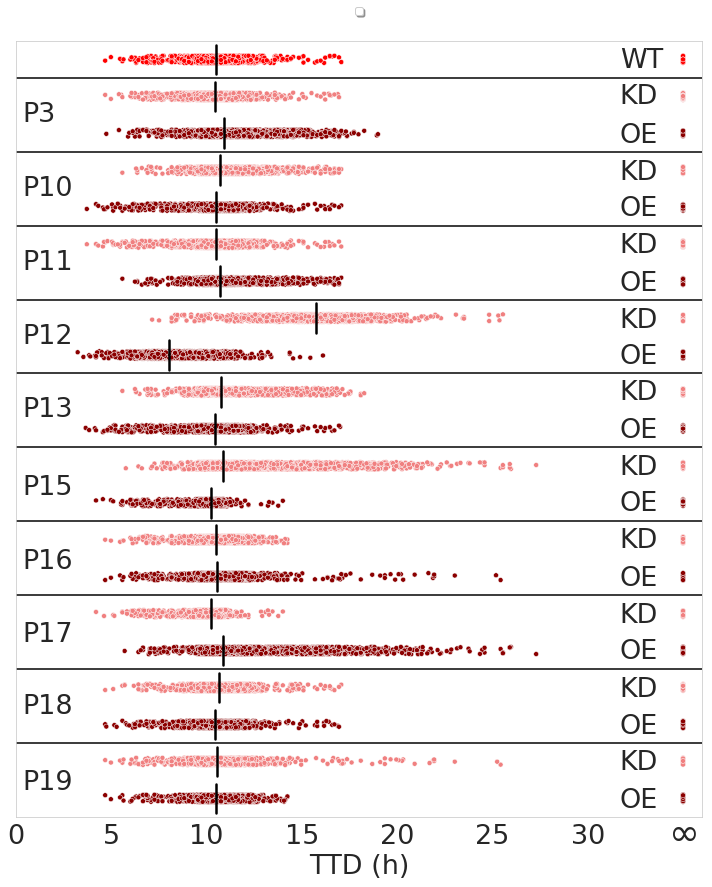

In [173]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize = (10,12))
my_pal = {"WT": "red",'P3 KD': "lightcoral", 'P3 OE':"darkred",
          'P10 KD': "lightcoral",'P10 OE':"darkred",
          'P11 KD': "lightcoral",'P11 OE':"darkred",
          'P12 KD': "lightcoral",'P12 OE':"darkred",
          'P13 KD': "lightcoral",'P13 OE':"darkred", 
          'P15 KD': "lightcoral",'P15 OE':"darkred", 
          'P16 KD': "lightcoral",'P16 OE':"darkred",
          'P17 KD': "lightcoral",'P17 OE':"darkred",
          'P18 KD': "lightcoral",'P18 OE':"darkred",
          'P19 KD': "lightcoral", 'P19 OE':"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.stripplot(x="value", y="variable", data=pd.melt(dfmode1hr), marker = 'o',
                  linewidth=0.5,size=5, palette=my_pal, edgecolor = 'white')
# b = sns.swarmplot(data=dfm23, y="species", x="value", hue="variable", marker="o", alpha=0.5,dodge=True,linewidth=0.5,size=5)
# print(plt.yticks())
# plt.annotate('A20', xy = (0.01,.7), xycoords ='axes fraction', fontsize = 20)#(-0.2,.7)
# plt.annotate('cIAP', xy = (0.01,.42), xycoords ='axes fraction', fontsize = 20) #(-0.2,.42)
# plt.annotate('CYLD', xy = (0.01,.12), xycoords ='axes fraction', fontsize = 20) #(-0.2,.12)

# plt.annotate('A20', xy = (-0.09,.7), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('cIAP', xy = (-0.09,.42), xycoords ='axes fraction', fontsize = 20)
# plt.annotate('CYLD', xy = (-0.1,.12), xycoords ='axes fraction', fontsize = 20)
# medianprops = dict(marker='-', markeredgecolor='black',
#                       markerfacecolor='k')
medianprops = dict(linestyle='-', linewidth=2.5, color='k')
#            meanprops=meanpointprops,
# boxprops = dict(linestyle='*', linewidth=30, color='k')
b = sns.boxplot(showmeans=False,
            meanline=False,
            medianprops= medianprops,
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfmode1hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)
# medians = pd.melt(dfmode1hr).groupby(['value'])['variable'].median()
# vertical_offset = pd.melt(dfmode1hr)['variable'].median() * 0.05 # offset from median for display

# for xtick in box_plot.get_xticks():
#     box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
#             horizontalalignment='center',size='large',color='black',weight='semibold')
# for median in b['medians']:
#     median.set(color='k', linewidth=1.5)
#     x,y = median.get_data()
#     xn = (x-(x.sum()/2.))*0.5+(x.sum()/2.)
#     plt.plot(xn, y, color="k", linewidth=10, solid_capstyle="butt", zorder=4)
#{'color': 'k', marker='D','lw': 30},

# labels = [e.get_text() for e in plt.gca().get_xticklabels()]
# print(labels)
# ticks = plt.gca().get_xticks()
# w = 0.1
# for day, idx in enumerate(labels):
#     idx = labels.index(day)
#     plt.hlines(pd.melt(dfmode1hr)[pd.melt(dfmode1hr)['value'] == day]['variable'].mean(), ticks[idx]-w, ticks[idx]+w)
# plt.plot([np.mean(dfmode1hr['WT'])],[0], '*','k', ms=7)
plt.axhline(y=0.5, color = 'k')
plt.axhline(y=2.5, color = 'k')
plt.axhline(y=4.5, color = 'k')
plt.axhline(y=6.5, color = 'k')
plt.axhline(y=8.5, color = 'k')
plt.axhline(y=10.5, color = 'k')
plt.axhline(y=12.5, color = 'k')
plt.axhline(y=14.5, color = 'k')
plt.axhline(y=16.5, color = 'k')
plt.axhline(y=18.5, color = 'k')
plt.annotate('WT', xy = (0.88,.965), xycoords ='axes fraction', fontsize = 27)#(-0.2,.7)
plt.annotate('KD', xy = (0.88,.919), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.88,.869), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.88,.821), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.88,.775), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.88,.727), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.88,.678), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.88,.630), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.88,.584), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.88,.537), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.88,.488), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.88,.441), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.88,.394), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.88,.347), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.88,.298), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.88,.25), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.88,.203), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.88,.155), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.88,.107), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('KD', xy = (0.88,.06), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('OE', xy = (0.88,.012), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
# plt.plot([11], [1], 'o', ms=20, zorder =2)
# # plt.axhline(y=18.5, color = 'k')
# # plt.yticks(ticks = plt.yticks()[0], labels = ['WT', 'KD', 'OE','KD', 'OE','KD', 'OE'])
plt.yticks(ticks = plt.yticks()[0], labels = ['', '', '','', '','', '',
                                             '', '', '',''])
plt.annotate('P3', xy = (0.01,.895), xycoords ='axes fraction', fontsize = 27)#(-0.2,.7)
plt.annotate('P10', xy = (0.01,.80), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('P11', xy = (0.01,.705), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('P12', xy = (0.01,.61), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('P13', xy = (0.01,.515), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('P15', xy = (0.01,.415), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('P16', xy = (0.01,.32), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('P17', xy = (0.01,.225), xycoords ='axes fraction', fontsize = 27) #(-0.2,.42)
plt.annotate('P18', xy = (0.01,.132), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate('P19', xy = (0.01,.035), xycoords ='axes fraction', fontsize = 27) #(-0.2,.12)
plt.annotate(r'$\infty$', xy = (0.95,-0.035), xycoords ='axes fraction', fontsize = 37)
# plt.annotate('*', xy = (0.292,0.964), xycoords ='axes fraction', fontsize = 20, color = 'k')
# plt.annotate('*', xy = (0.293,0.918), xycoords ='axes fraction', fontsize = 20, color = 'k')
# plt.annotate('*', xy = (11,2.25), xycoords ='data', fontsize = 20, color = 'k')
# plt.hlines(pd.melt(dfmode1hr)[pd.melt(dfmode1hr)['value'] == day]['total_bill'].mean(), ticks[idx]-w, ticks[idx]+w)
# print(plt.yticks()[0])
b.set_xlabel("TTD (h)",fontsize = 27)
plt.xticks(fontsize = 27)
b.set_ylabel("")
b.tick_params(labelsize=27)
plt.xlim(xmax = 36, xmin = 0)
ax.set_xticks([0,5, 10, 15, 20, 25,30])
# ax.set_xticks([0,300, 600, 900, 1200, 1500,1800])
plt.tight_layout()
# plt.xlim(xmin = 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig('pmlkl_mode1_paramsens_100tnf_stripdots_hrs_kdoeinside_edgewhite_testingmedian.pdf')

In [158]:
mel = pd.melt(dfmode1hr)
mel.head()

,variable,value
0,WT,10.340681
1,WT,11.843687
2,WT,11.963928
3,WT,9.979960
4,WT,10.521042


In [156]:
dfmode1hr.groupby(['value'])['variable'].median()

KeyError: 'value'

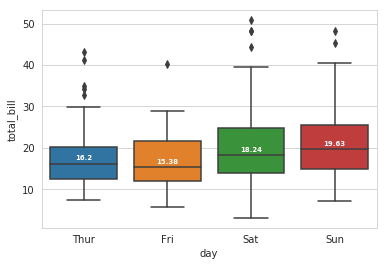

In [150]:
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
box_plot = sns.boxplot(x="day",y="total_bill",data=tips)

medians = tips.groupby(['day'])['total_bill'].median()
vertical_offset = tips['total_bill'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

Text(0.5, 1.0, 'Using showmeans')

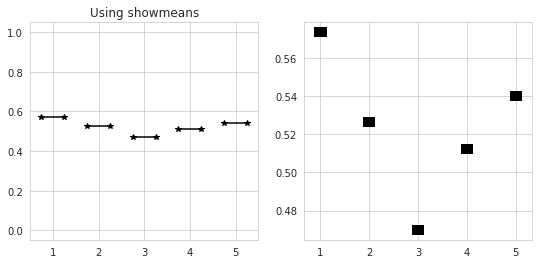

In [151]:
data_to_plot = np.random.rand(100,5)
positions = np.arange(5) + 1

fig, ax = plt.subplots(1,2, figsize=(9,4))

# matplotlib > 1.4
medianprops = dict(marker='*', linewidth=4, color='k')
bp = ax[0].boxplot(data_to_plot, positions=positions, showmeans=False,
                   showfliers=False,whiskerprops={'visible': False},medianprops=medianprops,
            showbox=False,
            showcaps=False)
for median in bp['medians']:
    median.set(color='k', linewidth=1.5,)
    x,y = median.get_data()
    xn = (x-(x.sum()/2.))*0.5+(x.sum()/2.)
    plt.plot(xn, y, color="k", linewidth=10, solid_capstyle="butt", zorder=4)
ax[0].set_title("Using showmeans")

#matpltolib < 1.4
# bp = ax[1].boxplot(data_to_plot, positions=positions)
# means = [np.mean(data) for data in data_to_plot.T]
# ax[1].plot(positions, means, 'rs')
# ax[1].set_title("Plotting means manually")

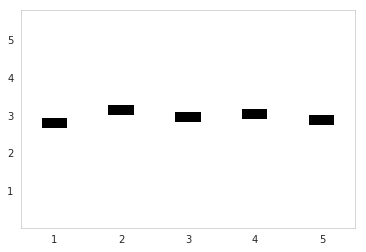

In [139]:
data = np.random.normal(loc=3., size=(100,5))

bp = plt.boxplot(data,sym='',widths=0.75, patch_artist=True, showmeans=False,
                   showfliers=False,whiskerprops={'visible': False},medianprops={'visible': False},
            showbox=False,
            showcaps=False)

for median in bp['medians']:
    median.set(color='k', linewidth=1.5)
    x,y = median.get_data()
    xn = (x-(x.sum()/2.))*0.5+(x.sum()/2.)
    plt.plot(xn, y, color="k", linewidth=10, solid_capstyle="butt", zorder=4)

plt.show()

In [ ]:
sns.boxplot(showmean=True,
            meanline=False,
            medianprops={'visible':False},
            whiskerprops={'visible': False},
            zorder=10,
            x="value",
            y="variable",
            data=pd.melt(dfmode1hr),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=b)

In [118]:
print(np.median(dfmode1hr['WT']))
print(np.median(dfmode1hr['P3 KD']))
print(np.median(dfmode1hr['P3 OE']))
print(np.median(dfmode1hr['P10 KD']))
print(np.median(dfmode1hr['P10 OE']))
print(np.median(dfmode1hr['P11 KD']))
print(np.median(dfmode1hr['P11 OE']))
print(np.median(dfmode1hr['P12 KD']))
print(np.median(dfmode1hr['P12 OE']))

print(np.median(dfmode1hr['P13 KD']))
print(np.median(dfmode1hr['P13 OE']))
print(np.median(dfmode1hr['P15 KD']))
print(np.median(dfmode1hr['P15 OE']))
print(np.median(dfmode1hr['P16 KD']))
print(np.median(dfmode1hr['P16 OE']))

print(np.median(dfmode1hr['P17 KD']))
print(np.median(dfmode1hr['P17 OE']))
print(np.median(dfmode1hr['P18 KD']))
print(np.median(dfmode1hr['P18 OE']))
print(np.median(dfmode1hr['P19 KD']))
print(np.median(dfmode1hr['P10 OE']))

10.521042084168336
10.460921843687377
10.94188376753507
10.701402805611224
10.521042084168336
10.521042084168336
10.701402805611224
15.751503006012024
8.056112224448897
10.761523046092183
10.460921843687377
10.881763527054106
10.220440881763524
10.521042084168336
10.5811623246493
10.220440881763524
10.881763527054106
10.64128256513026
10.460921843687377
10.5811623246493
10.521042084168336


In [80]:
print(np.median(dfmode1hr['WT']))
print(np.median(dfmode1hr['P3 KD']))
print(np.median(dfmode1hr['P3 OE']))
print(np.median(dfmode1hr['P10 KD']))
print(np.median(dfmode1hr['P10 OE']))
print(np.median(dfmode1hr['P11 KD']))
print(np.median(dfmode1hr['P11 OE']))
print(np.median(dfmode1hr['P12 KD']))
print(np.median(dfmode1hr['P12 OE']))

print(np.median(dfmode1hr['P13 KD']))
print(np.median(dfmode1hr['P13 OE']))
print(np.median(dfmode1hr['P15 KD']))
print(np.median(dfmode1hr['P15 OE']))
print(np.median(dfmode1hr['P16 KD']))
print(np.median(dfmode1hr['P16 OE']))

print(np.median(dfmode1hr['P17 KD']))
print(np.median(dfmode1hr['P17 OE']))
print(np.median(dfmode1hr['P18 KD']))
print(np.median(dfmode1hr['P18 OE']))
print(np.median(dfmode1hr['P19 KD']))
print(np.median(dfmode1hr['P10 OE']))

10.744734962296299
10.817779803712835
11.345881777424475
11.063914236239471
10.705305201248546
10.713162802720557
11.048349125435335
15.75658946186409
8.500712937664511
11.21402583252497
10.646677543714334
12.218695365766207
10.28025259951248
10.739390014425522
10.853585117530486
10.257391343018908
12.179579686418606
10.855263925910071
10.641099119181499
10.828697617148306
10.705305201248546


In [77]:
dfmode1hr.columns

Index(['WT', 'P3 KD', 'P3 OE', 'P10 KD', 'P10 OE', 'P11 KD', 'P11 OE',
       'P12 KD', 'P12 OE', 'P13 KD', 'P13 OE', 'P15 KD', 'P15 OE', 'P16 KD',
       'P16 OE', 'P17 KD', 'P17 OE', 'P18 KD', 'P18 OE', 'P19 KD', 'P19 OE'],
      dtype='object')

In [26]:
print(ttdm2wt2.count(35))
print(ttdm2a20kd2.count(35))
print(ttdm2a20oe2.count(35))
print(ttdm2cyldkd2.count(235))
print(ttdm2cyldoe2.count(35))
print(ttdm2ciapkd2.count(35))
print(ttdm2ciapoe2.count(35))

20
15
24
0
14
26
33
